# Simple Linear Regression

1) Delivery_time -> Predict delivery time using sorting time 
2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# Salary_hike -> Build a prediction model for Salary_hike

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.formula.api as smdf1 
import statsmodels.api as smf
import warnings
warnings.filterwarnings('ignore')

In [41]:
salary_hike=pd.read_csv('Salary_Data (1).csv')

In [42]:
salary_hike

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


# Applying EDA on Data

In [43]:
salary_hike.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [44]:
salary_hike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [45]:
salary_hike.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [46]:
salary_hike.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [47]:
salary_hike[salary_hike.duplicated()].shape

(0, 2)

In [48]:
salary_hike[salary_hike.duplicated()]

,YearsExperience,Salary


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

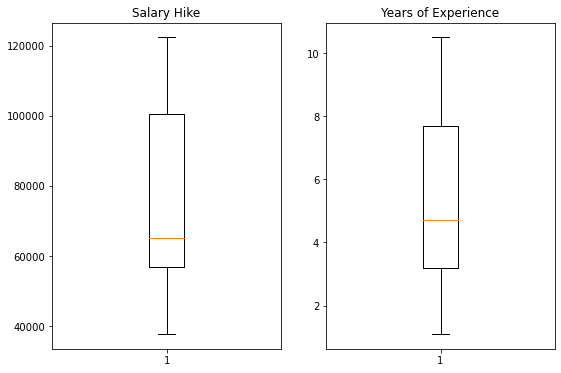

In [49]:
plt.subplots(figsize = (9,6))#Plotting the data to check for outliers
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(salary_hike['YearsExperience'])
plt.title('Years of Experience')
plt.show()

# There is no outliers the above data

In [50]:
salary_hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

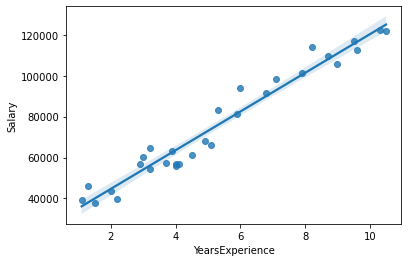

In [51]:
sns.regplot(x=salary_hike['YearsExperience'],y=salary_hike['Salary']) #Visualization of Correlation beteen x and y#regplot = regression plot

# There is correlation between the two variable,and the score is more than 0.8 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

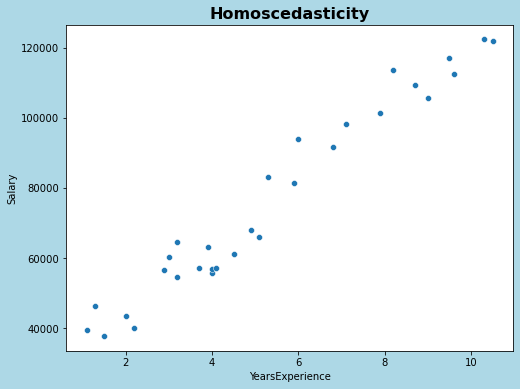

In [52]:
plt.figure(figsize = (8,6), facecolor = 'lightblue')#Checking for Homoscedasticity or Hetroscedasticity
sns.scatterplot(x = salary_hike['YearsExperience'], y = salary_hike['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

# It shows as the Salary Increases the Years of Experience increases variation is ocnstant along the way in data. The data doesn't have any specific pattern in the variation.hence it is Homoscedasticity.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

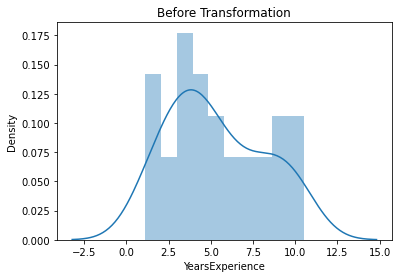

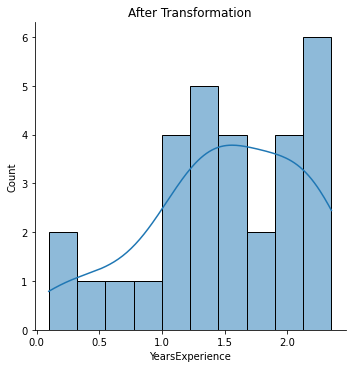

In [53]:
sns.distplot(salary_hike['YearsExperience'], bins = 10, kde = True)#Trying different transformation of data to estimate normal distribution and remove any skewness
plt.title('Before Transformation')
sns.displot(np.log(salary_hike['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

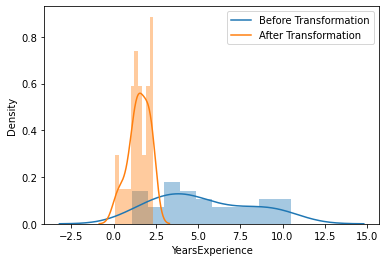

In [54]:
labels = ['Before Transformation','After Transformation']
sns.distplot(salary_hike['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(salary_hike['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

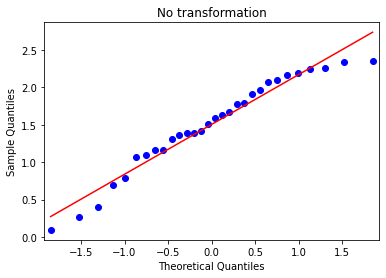

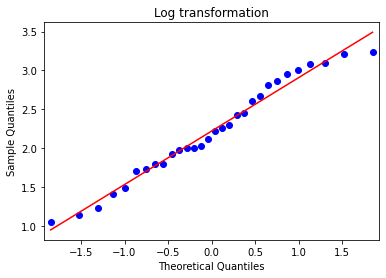

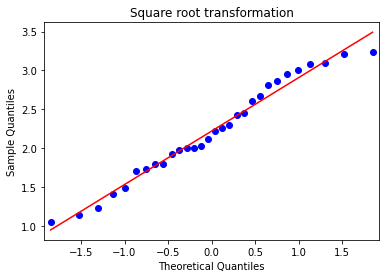

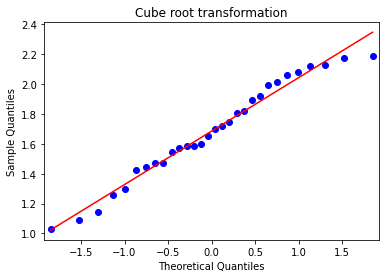

In [18]:
smf.qqplot(np.log(df['YearsExperience']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

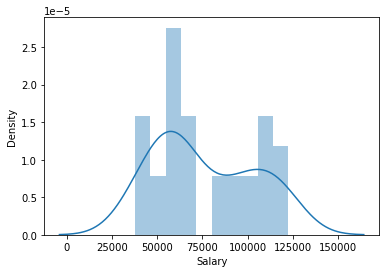

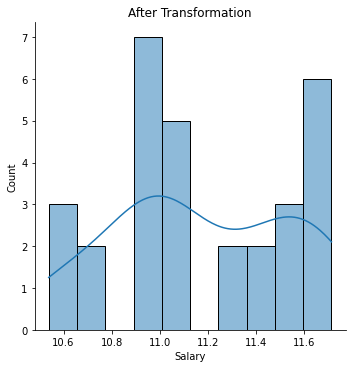

In [55]:
labels = ['Before Transformation','After Transformation']
sns.distplot(salary_hike['Salary'], bins = 10, kde = True)
sns.displot(np.log(salary_hike['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

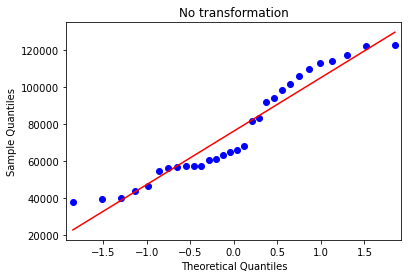

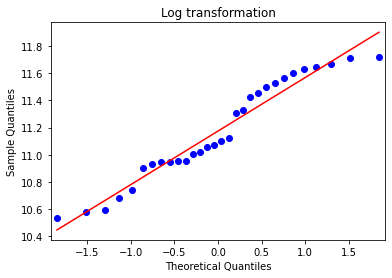

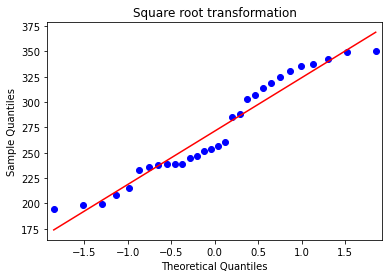

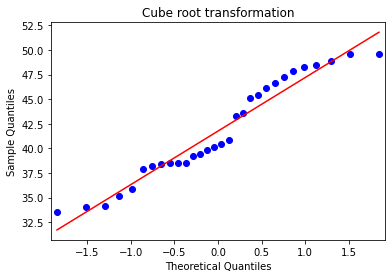

In [56]:
smf.qqplot(salary_hike['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(salary_hike['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(salary_hike['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(salary_hike['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [57]:
import statsmodels.formula.api as sm#Fitting a Linear Regression Model
model = sm.ols('Salary~YearsExperience', data = salary_hike).fit()

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        11:23:52   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The R-squared and Adjusted R-squared scores are above 0.85. (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction) F-statitics is quite high as well and yes desire it to be higher But log-likelihood is quite very low far away from 0 and AIC and BIC score are much higher for this model Lets Try some data transformation to check whether these scores can get any better than this.

In [59]:
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = salary_hike).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           6.37e-18
Time:                        11:23:59   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [26]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [27]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

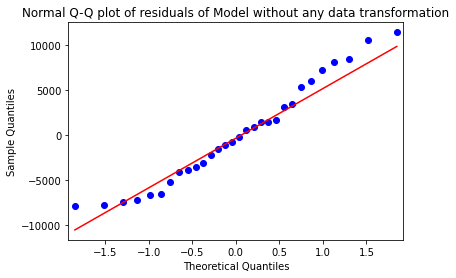

In [28]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

In [29]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

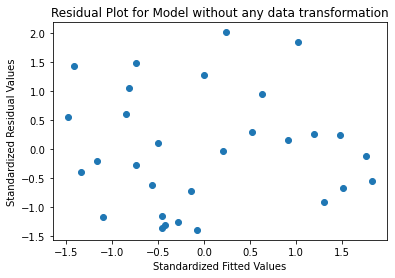

In [30]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error

In [60]:
model_pred_y =np.square(model.predict(salary_hike['YearsExperience']))
model2_pred_y =pow(model2.predict(salary_hike['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(salary_hike['YearsExperience']))

In [61]:
model_rmse =np.sqrt(mean_squared_error(salary_hike['Salary'], model_pred_y))
model2_rmse =np.sqrt(mean_squared_error(salary_hike['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(salary_hike['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model=', model_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119395 
model= 7772709424.91972 
model2= 6232.8154558358565 
model3= 7219.716974372802


In [39]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

In [62]:
predicted2 = pd.DataFrame()#predicting values
predicted2['YearsExperience'] = salary_hike.YearsExperience
predicted2['Salary'] = salary_hike.Salary
predicted2['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(predicted2.YearsExperience))
predicted2

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343,36187.158752
1,1.3,46205,38077.151217
2,1.5,37731,39967.143681
3,2.0,43525,44692.124842
4,2.2,39891,46582.117306
5,2.9,56642,53197.090931
6,3.0,60150,54142.087163
7,3.2,54445,56032.079627
8,3.2,64445,56032.079627
9,3.7,57189,60757.060788


# Question 2

# Delivery Time-Predict delivery time using sorting time 

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('delivery_time (1).csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df1 = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
df[df.duplicated()].shape

(0, 2)

In [10]:
df[df.duplicated()]

,Delivery Time,Sorting Time


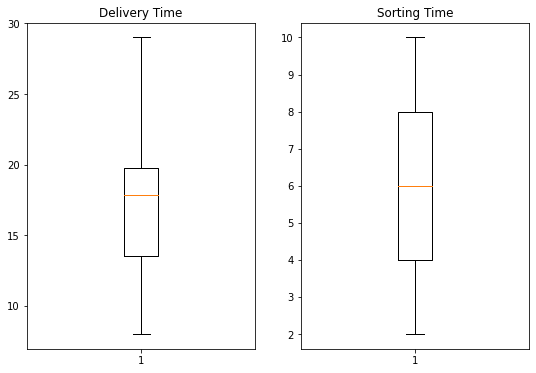

In [11]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

 There are no Outliers in the data

In [12]:
df.corr()#Checking the Correlation between variables

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

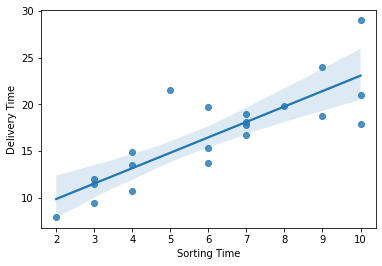

In [13]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time']) 

There is correlation between the two variable. The score is more than 0.8 

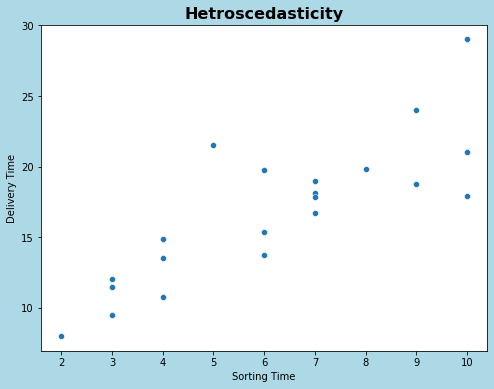

In [40]:
plt.figure(figsize = (8,6), facecolor = 'lightblue')
sns.scatterplot(x = df['Sorting Time'], y = df['Delivery Time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [15]:
df.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

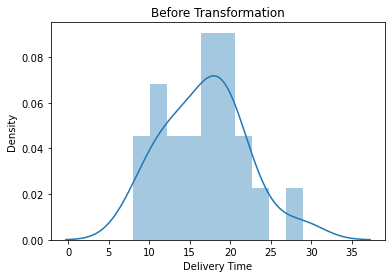

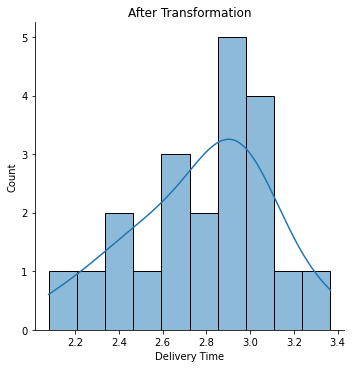

In [16]:
sns.distplot(df['Delivery Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Delivery Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()


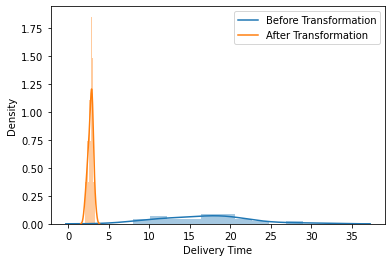

In [17]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Delivery Time'], bins = 10, kde = True)
sns.distplot(np.log(df['Delivery Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

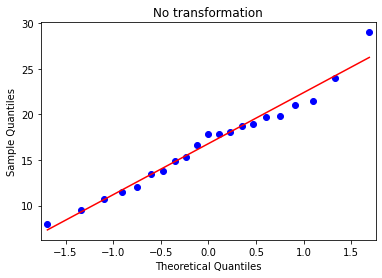

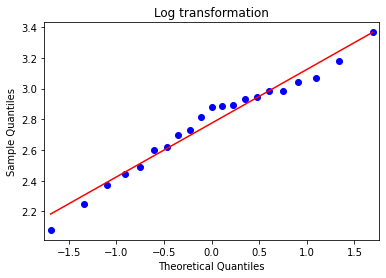

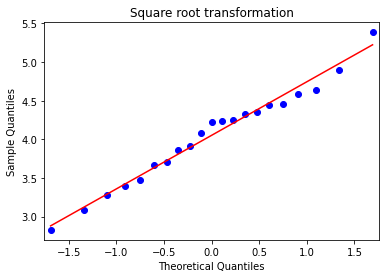

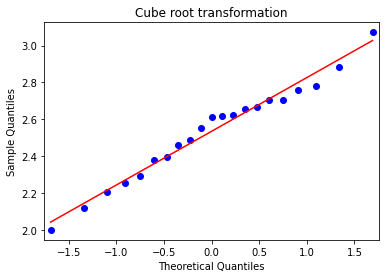

In [18]:
smf.qqplot(df['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Delivery Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Delivery Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['Delivery Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

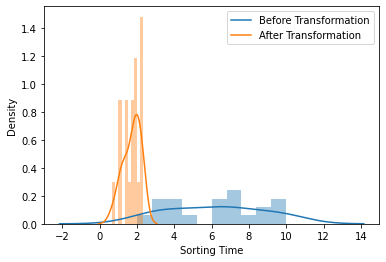

In [19]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Sorting Time'], bins = 10, kde = True)
sns.distplot(np.log(df['Sorting Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()


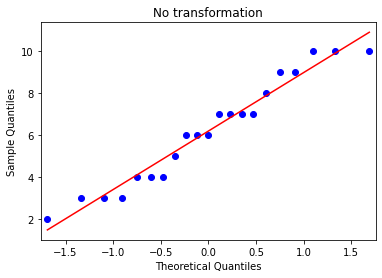

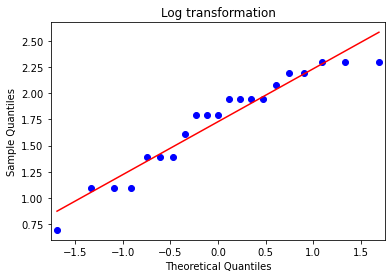

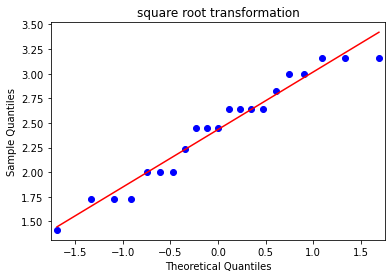

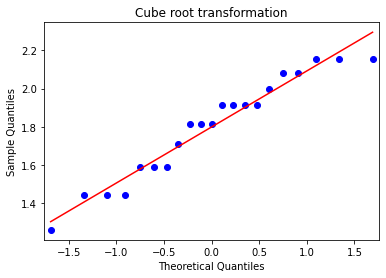

In [20]:
smf.qqplot(df['Sorting Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Sorting Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Sorting Time']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(df['Sorting Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [21]:
model = sm.ols('Delivery_Time~Sorting_Time', data = df1).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        13:02:20   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model1 = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = df1).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Wed, 08 Feb 2023   Prob (F-statistic):           8.48e-07
Time:                            13:02:34   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model2 = sm.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Wed, 08 Feb 2023   Prob (F-statistic):           4.90e-07
Time:                            13:02:47   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model3 = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df1).fit()#Log transformation on Data
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Wed, 08 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                           13:03:03   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model.params#Model Testing

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [27]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [28]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

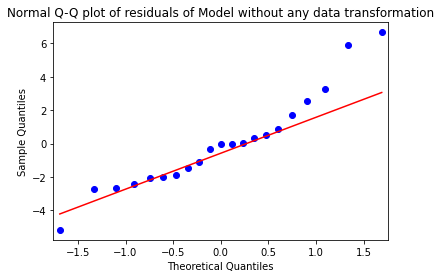

In [29]:
import statsmodels.api as sm#Test for Normality of Residuals (Q-Q Plot)
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

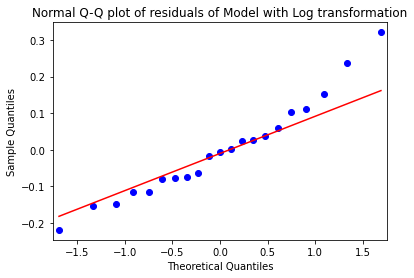

In [30]:
sm.qqplot(model2.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

In [31]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

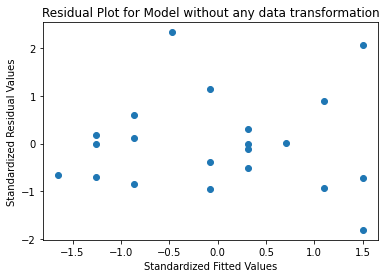

In [32]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

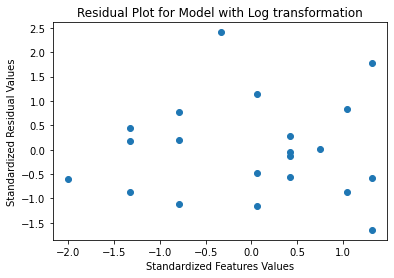

In [33]:
plt.scatter(get_standardized_values(model2.fittedvalues), get_standardized_values(model2.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error#Model Validation

In [35]:
model1_pred_y =np.square(model1.predict(df1['Sorting_Time']))
model2_pred_y =pow(model2.predict(df1['Sorting_Time']),3)
model3_pred_y =np.exp(model3.predict(df1['Sorting_Time']))

In [36]:
model1_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 2.9349037688901394 
model1= 2.762294279320867 
model2= 2.755584309893575 
model3= 2.7458288976145497


In [37]:
data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(data, key=data.get)

'model2'

In [38]:
predicted = pd.DataFrame()#Predicting values from Model with Log Transformation on the Data
predicted['Sorting_Time'] = df1.Sorting_Time
predicted['Delivery_Time'] = df1.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model2.predict(predicted.Sorting_Time)))
predicted


,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,17.035997
1,4,13.50,10.547128
2,6,19.75,12.808396
3,9,24.00,15.997918
4,10,29.00,17.035997
5,6,15.35,12.808396
6,7,19.00,13.889274
7,3,9.50,9.328887
8,10,17.90,17.035997
9,9,18.75,15.997918


In [39]:
predicted1 = pd.DataFrame()#Predicitng from Original Model without any data transformation
predicted1['Sorting_Time'] = df1.Sorting_Time
predicted1['Delivery_Time'] = df1.Delivery_Time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.Sorting_Time))
predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
